<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/05_Computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/Tensorflow'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Data

In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downladed file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-22 09:47:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.50M  33.7MB/s    in 3.2s    

2021-10-22 09:47:04 (32.7 MB/s) - ‘pizza_steak.zip.4’ saved [109579078/109579078]



### Inspecting the Data

In [6]:
!ls pizza_steak

test  train


In [7]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 1 directories and 0 images in pizza_steak/test
There are 0 directories and 134 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [9]:
# Get the classnames programatically
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['steak'], dtype='<U5')

In [10]:
# Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}")

  return img

['3514408.jpg']
image shape : (384, 512, 3)


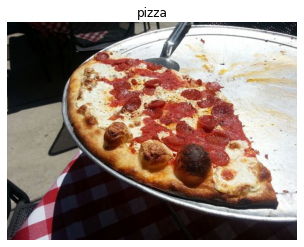

In [11]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['1650002.jpg']
image shape : (512, 512, 3)


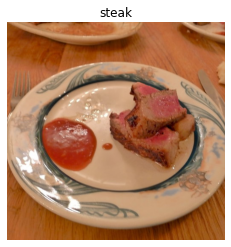

In [12]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

### End to End Example

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Set random seed
tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

#setup data paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and trun into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 134 images belonging to 1 classes.
Epoch 1/5
47/47 [==============================] - 43s 269ms/step - loss: 0.5669 - accuracy: 0.6780 - val_loss: 0.6610 - val_accuracy: 0.6343
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4345 - accuracy: 0.8000 - val_loss: 0.3697 - val_accuracy: 0.8209
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3948 - accuracy: 0.8293 - val_loss: 0.5851 - val_accuracy: 0.7164
Epoch 4/5
47/47 [==============================] - 12s 255ms/step - loss: 0.3696 - accuracy: 0.8333 - val_loss: 0.4639 - val_accuracy: 0.7836
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3590 - accuracy: 0.8520 - val_loss: 0.4846 - val_accuracy: 0.7761


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

### using the simple neuralnet on this dataset

In [16]:
# set random seed
tf.random.set_seed(42)

# Build a model
model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(4,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 234ms/step - loss: 0.7896 - accuracy: 0.5200 - val_loss: 0.7040 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.7032 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6995 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.6933 - accuracy: 0.4733 - val_loss: 0.6951 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.0000e+00


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Model_3

# set random seed
tf.random.set_seed(42)

# Build a model
model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224,224, 3)),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(100,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 240ms/step - loss: 3.0096 - accuracy: 0.6173 - val_loss: 7.8350 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 1.3268 - accuracy: 0.6707 - val_loss: 0.9365 - val_accuracy: 0.5746
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6203 - accuracy: 0.7427 - val_loss: 0.6925 - val_accuracy: 0.7090
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4628 - accuracy: 0.7947 - val_loss: 0.2772 - val_accuracy: 0.9328
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.4938 - accuracy: 0.7760 - val_loss: 1.5298 - val_accuracy: 0.4403


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Breakdown of Binary Classification

### 1. Data exploration again!

['3136.jpg']
image shape : (354, 512, 3)
['1143057.jpg']
image shape : (512, 512, 3)


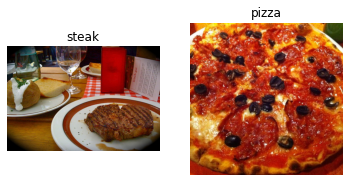

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the Data

In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
!nvidia-smi

Fri Oct 22 09:51:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    71W / 149W |   1281MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
# create train and test data generation and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)


In [24]:
# Load images and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 134 images belonging to 1 classes.


In [25]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [26]:
len(train_data)

47

In [27]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [28]:
images[7], images[7].shape

(array([[[0.16078432, 0.10980393, 0.13725491],
         [0.16078432, 0.10980393, 0.13725491],
         [0.16862746, 0.11764707, 0.14509805],
         ...,
         [0.10980393, 0.1137255 , 0.12941177],
         [0.11764707, 0.12156864, 0.12941177],
         [0.09019608, 0.10588236, 0.10980393]],
 
        [[0.1764706 , 0.1254902 , 0.15294118],
         [0.17254902, 0.12156864, 0.14901961],
         [0.1764706 , 0.13333334, 0.15686275],
         ...,
         [0.12156864, 0.10196079, 0.11764707],
         [0.1137255 , 0.10588236, 0.11764707],
         [0.10588236, 0.10588236, 0.1137255 ]],
 
        [[0.17254902, 0.12156864, 0.14901961],
         [0.16078432, 0.11764707, 0.14117648],
         [0.16470589, 0.12156864, 0.14509805],
         ...,
         [0.20392159, 0.16078432, 0.1764706 ],
         [0.17254902, 0.13725491, 0.15686275],
         [0.12941177, 0.10196079, 0.12941177]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.12941177],
         [0.09411766, 0.09411766, 0.13333

In [29]:
#view the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Creating a model